In [20]:
%matplotlib widget

In [21]:
# initialization
from rayoptics.environment import *

In [22]:
root_pth = Path(rayoptics.__file__).resolve().parent

NameError: name 'rayoptics' is not defined

In [ ]:
app = AppManager(None)

# Create or Open a new model

In [ ]:
app.model = open_model(root_pth/"codev/tests/questar35.seq")
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## Define first order aperture and field for system

In [ ]:
#osp.pupil = PupilSpec(type="FNO", value=10.)
#osp.field_of_view = FieldSpec(type="IMG_HT", flds=[0., 0.5])
osp.parax_data.fod.list_first_order_data()

## Define interface and gap data for the sequential model

In [ ]:
#sm.gaps[0].thi=1e10

#sm.insert(srf.Surface(lbl='M1', refract_mode='REFL', profile=Conic(c=-0.01)), Gap(-33.))

#sm.insert(srf.Surface(lbl='M2', refract_mode='REFL', profile=Conic(c=-0.01)), Gap(50.))
sm.list_surfaces()

## Update the model

In [ ]:
opm.update_model()

## Build the paraxial model and list

In [ ]:
pm.list_lens()
print("\n")
osp.parax_data.fod.list_first_order_data()

In [ ]:
abr_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same)
wav_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same)

In [23]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm)

FigureCanvasNbAgg()

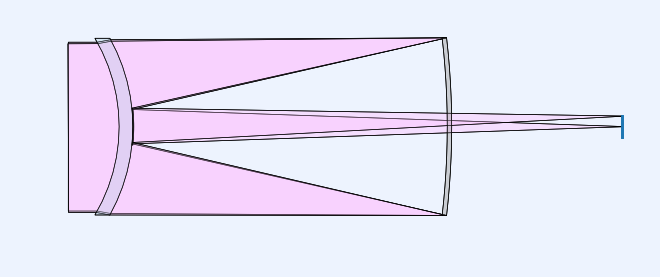

In [24]:
layout_plt.update_data()
layout_plt.plot()

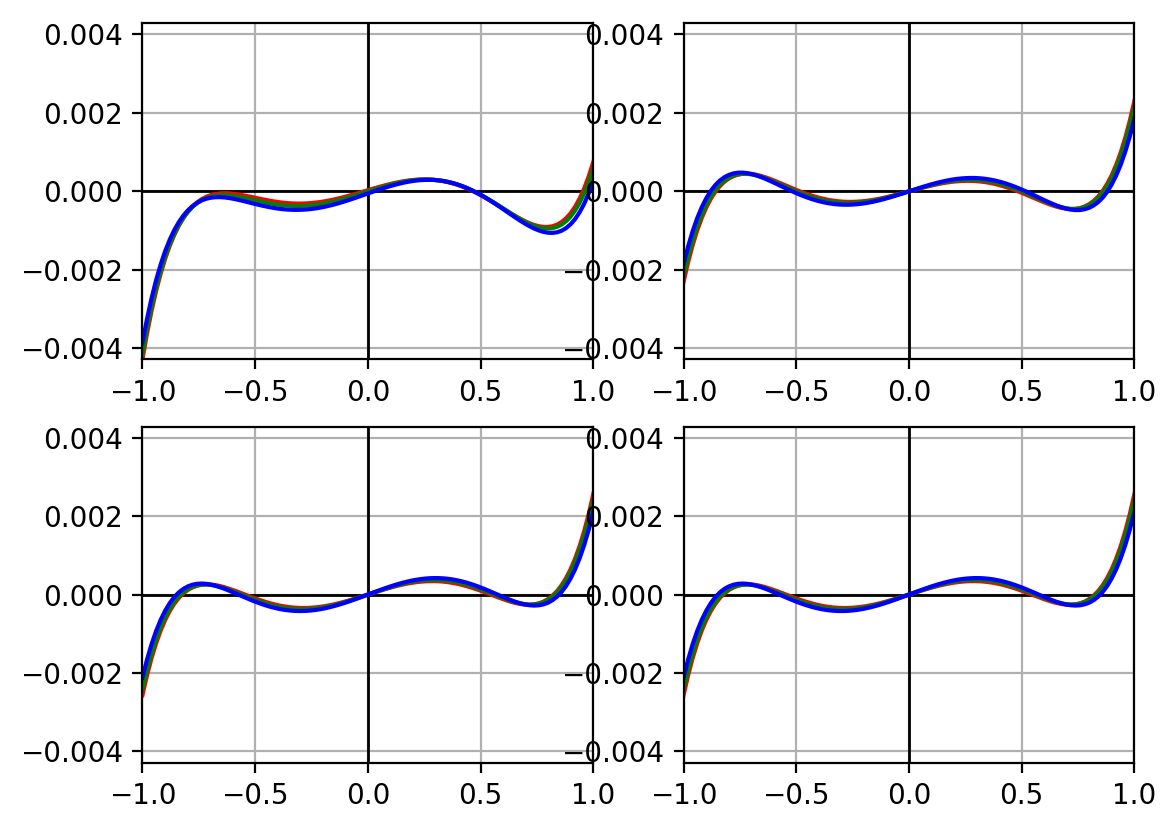

In [25]:
abr_fan_plt.update_data()
abr_fan_plt.plot()

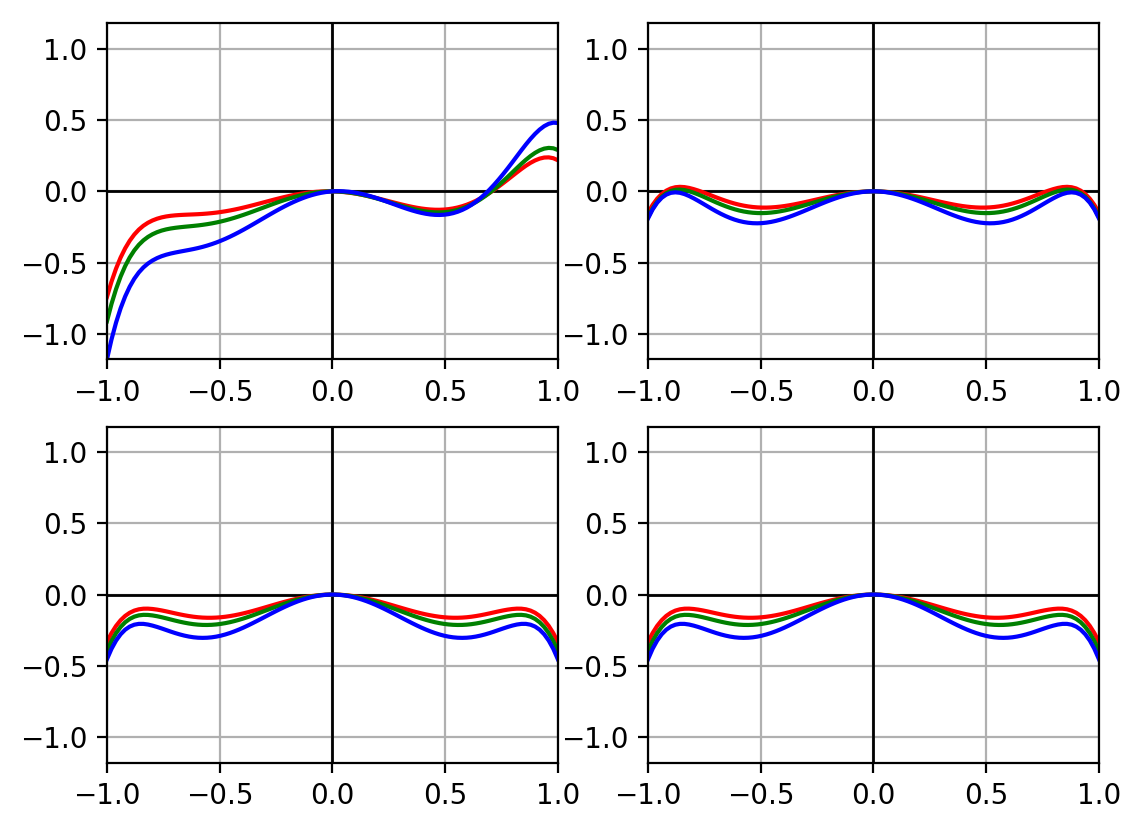

In [26]:
wav_fan_plt.update_data()
wav_fan_plt.plot()

In [27]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)
grid=sm.trace_wavefront(fld, wvl, foc, num_rays=64)

In [28]:
grid = np.rollaxis(grid, 2)
max_val = max(np.max(grid[2]), -np.min(grid[2])); max_val

0.8685667653157316

In [29]:
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1, 2, figsize=(8, 4))
im = axes.imshow(grid[2].T, cmap=mpl.cm.RdBu_r, vmin=-max_val, vmax=max_val, extent=[-1, 1, -1, 1], origin='lower')
#im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes)
fig.tight_layout()

FigureCanvasNbAgg()

In [30]:
fig = plt.figure()
vmin = -max_val
vmax = max_val
levs = np.linspace(np.floor(vmin), np.ceil(vmax), num=20)

plt.contour(grid[2].T, levs, colors='black', linewidths=1, vmin=vmin, vmax=vmax)
plt.contourf(grid[2].T, levs, cmap=mpl.cm.RdBu_r, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

FigureCanvasNbAgg()